In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import json
import sys
sys.path.append("../code")
import util
from tqdm import tqdm

path = '../data' #'<dataset path>'
path = '/project/nscore/swri_generated/uav2/generated_14/generation_1/neurips/AircraftVerse'
corpus = '../data/corpus_dic'

In [4]:
designs = os.listdir(path)

design_parts = []
output_files = []
design_type = []
for design in tqdm(designs):
    parts = util.collect_design_parts(path, design)
    
    out = open(os.path.join(os.path.join(path,design), 'output.json'))
    out_json = json.load(out)
    out.close()
    
    tree = open(os.path.join(os.path.join(path,design), 'design_tree.json'))
    tree_json = json.load(tree)
    tree.close()

    design_type.append(tree_json['hub']['node_type'])
    output_files.append(out_json)
    design_parts.append(parts)

100%|████████████████████████████████████████████████████████████████████████████████████| 27714/27714 [04:27<00:00, 103.55it/s]


In [16]:
print(output_files[-1].keys())
print(design_parts[-1])

dict_keys(['Interferences', 'Mass', 'Batt_amps_ratio_MFD', 'Batt_amps_ratio_MxSpd', 'Distance_MxSpd', 'Max_Distance', 'Hover_Time', 'Max_Speed', 'Max_uc_at_MFD', 'Mot_amps_ratio_MFD', 'Mot_amps_ratio_MxSpd', 'Mot_power_ratio_MFD', 'Mot_power_ratio_MxSpd', 'Power_MFD', 'Power_MxSpd', 'Speed_MFD'])
['Tube', 'Tube', 'Tube', 'Tube', 'Tube', 'Tube', 'BatteryController', 'Battery', 'Cargo', 'CargoCase', 'Flange', 'Flange', 'Flange', 'Flange', 'Flange', 'Flange', 'UAV_Fuselage', 'Para_Hub_6', 'Motor', 'Motor', 'Motor', 'Motor', 'Motor', 'Motor', 'Orient', 'Propeller', 'Propeller', 'Propeller', 'Propeller', 'Propeller', 'Propeller', 'Sensor', 'Sensor', 'Sensor', 'Sensor', 'Sensor', 'Sensor']


In [5]:
mass = [output['Mass'] for output in output_files]
hover_time = [output['Hover_Time'] for output in output_files]
max_vel = [output['Max_Speed'] for output in output_files]
max_distance = [output['Max_Distance'] for output in output_files]

In [17]:
prop_count_full = [design.count('Propeller') for design in design_parts]
wing_count_full = [design.count('Wing') for design in design_parts]

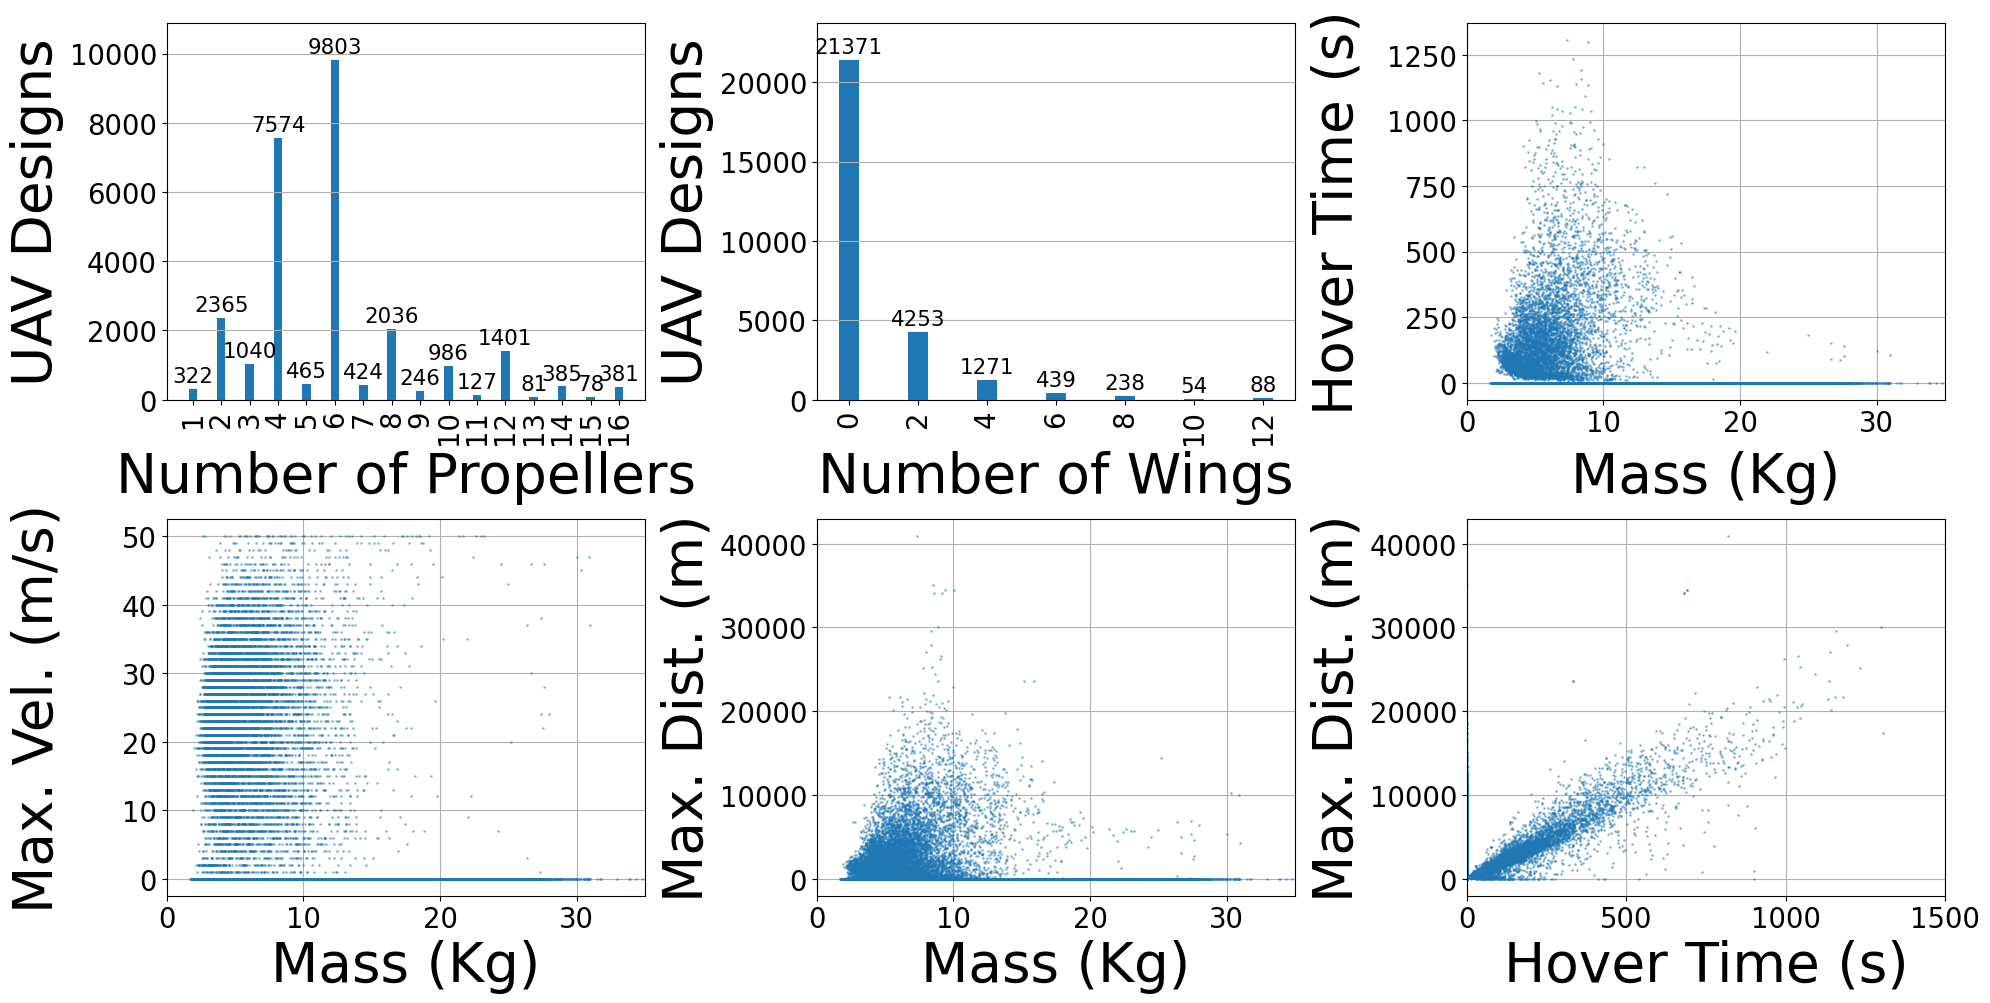

In [19]:
hist_data = [prop_count_full, wing_count_full]
hist_labels = [["Number of Propellers","UAV Designs"],["Number of Wings", "UAV Designs"]]
scatter_labels = [["Mass (Kg)", "Hover Time (s)"],["Mass (Kg)", "Max. Vel. (m/s)"], ["Mass (Kg)", "Max. Dist. (m)"], ["Hover Time (s)", "Max. Dist. (m)"]]
scatter_data = [[mass, hover_time],[mass, max_vel],[mass, max_distance],[hover_time, max_distance]]
xlim_scatter = [[0,35]]*3 +[[0, 1500]]

figsize = (20,10)

plt = util.subplot_hist_scatter(hist_data, scatter_data, hist_labels=hist_labels, scatter_labels=scatter_labels,
                           titles=None, fs=22, figsize=figsize, xlim=xlim_scatter)

plt.savefig('../figures/full_summary_plot.pdf')
plt.show()